# ***Assignment 1.3 - CAVI***
Consider the model defined by Equation (10.21)-(10-23) in Bishop, for which DGM is presented below:

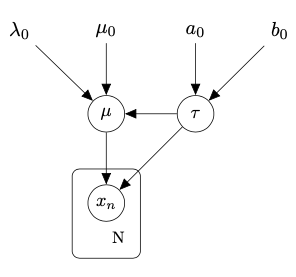

### ***Question 1.3.12:***

Implement a function that generates data points for the given model.

In [241]:
import numpy as np
import math

# Seed used during the assignement
np.random.seed(42)


def generate_data(mu, tau, N):
  # Insert your code here
  D = data = np.random.normal(mu, np.sqrt(1/tau), N)
  return D


Set μ = 1, τ = 0.5 and generate datasets with size N=10,100,1000. Plot the histogram for each of 3
datasets you generated.



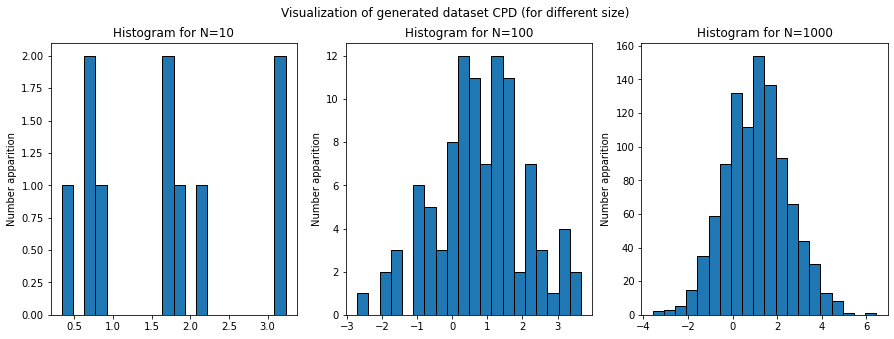

In [242]:
np.random.seed(42)
mu = 1
tau = 0.5
Ns = [10, 100, 1000]

# We define these 3 datasets by variable because we are going to reuse them after
dataset_1 = generate_data(mu, tau, Ns[0])
dataset_2 = generate_data(mu, tau, Ns[1])
dataset_3 = generate_data(mu, tau, Ns[2])
datasets = []
datasets.append(dataset_1)
datasets.append(dataset_2)
datasets.append(dataset_3)

# Visulaize the datasets via histograms
import matplotlib.pyplot as plt

# Plotting three histograms side by side
fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))
nb_bins = 20
for i in range(len(datasets)):
    axs[i].hist(datasets[i], bins=20, edgecolor='k')
    axs[i].set_title(f"Histogram for N={Ns[i]}")
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Number apparition')

fig.suptitle('Visualization of generated dataset CPD (for different size)')

# Display the plot
plt.show()



### ***Question 1.3.13:***

Find ML estimates of the variables μ and τ

ML used for generated dataset: mu = 1, tau = 0.5
ML estimates for generated Dataset 0: mu_ml =1.6336541009363472, tau_ml = 1.0627739208616722
ML estimates for generated Dataset 1: mu_ml =0.7827819251423433, tau_ml = 0.6215053850988594
ML estimates for generated Dataset 2: mu_ml =1.0667465820249162, tau_ml = 0.5101520496611847


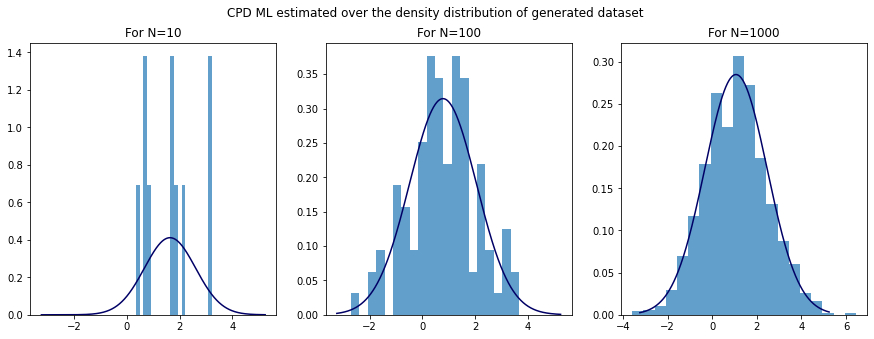

In [248]:
from scipy.stats import norm

def ML_est(data):
  # insert your code
  N = len(data)
  mu_ml = np.sum(data)/N
  MSE = 0.0
  for d in data:
    MSE += (d-mu_ml)**2
  tau_ml = N/MSE
  return mu_ml, tau_ml

# We can compare the ML estimates and the real values parameter for generate datasets (mu = 1, tau = 0.5)
print(f"ML used for generated dataset: mu = {mu}, tau = {tau}")
fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))
for i in range(len(datasets)):
  mu_ml, tau_ml = ML_est(datasets[i])
  print(f"ML estimates for generated Dataset {i}: mu_ml ={mu_ml}, tau_ml = {tau_ml}")

  # We can display the CPD estimates over the generated dataset
  axs[i].hist(datasets[i], bins=20, density=True, alpha=0.7, label=f"Histogram repartition of dataset N={Ns[i]}")
  axs[i].set_title(f"For N={Ns[i]}")
  
  x = np.linspace(mu - 3 * np.sqrt(1/tau), mu + 3 * np.sqrt(1/tau), 1000)
  pdf_values = norm.pdf(x, loc=mu_ml, scale=np.sqrt(1/tau_ml))
  axs[i].plot(x, pdf_values, label='Normal Distribution', color='#000066')

fig.suptitle('CPD ML estimated over the density distribution of generated dataset')
plt.show()
  

As we can see, the ML estimates of variables μ and τ are in harmony with the real ones (even more so when the dataset is larger)

### ***Question 1.3.14:***
You will implement the VI algorithm for the variational distribution in Equation (10.24) in Bishop. Start with introducing the prior parameters:

In [245]:
# prior parameters
mu_0 =
lambda_0 =
a_0 =
b_0 =

SyntaxError: invalid syntax (3271977791.py, line 2)

Continue with a helper function that computes ELBO:


In [ ]:
from scipy.stats import gamma, norm
def compute_elbo (D, a_0, b_0, mu_0, lambda_0, a_N , b_N, mu_N, lambda_N):
  # given the prior and posterior parameters together with the data,
  # compute ELBO here


  return elbo


Now, implement the CAVI algorithm:

In [ ]:
def CAVI(D, a_0, b_0, mu_0, lambda_0):
  # make an initial guess for the expected value of tau
  initial_guess_exp_tau =

  # CAVI iterations ...
    # save ELBO for each iteration, plot them afterwards to show convergence

  return a_N, b_N, mu_N, lambda_N, elbos

### ***Question 1.3.15:***

What is the exact posterior? First derive it in closed form, and then implement a function that computes it for the given parameters:


In [ ]:
def compute_exact_posterior(D, a_0, b_0, mu_0, lambda_0):
  # your implementation

  return exact_post_distribution

### ***Question 1.3.16:***
Run the VI algorithm on the datasets. Compare the inferred variational
distribution with the exact posterior and the ML estimate. Visualize the results and discuss your
findings.



In [ ]:
# Insert your main code here


# Example flow for dataset_2:
  ##  mu_ml, tau_ml = ML_est(dataset_2)
  ##  a_N, b_N, mu_N, lambda_N, elbos = CAVI(dataset_2, a_0, b_0, mu_0, lambda_0)
  ##  plot elbos, show convergence
  ##  exact_post_dist = compute_exact_posterior(dataset_2, a_0, b_0, mu_0, lambda_0)
  ##  compare exact_post_dist with the CAVI result ( = q(a_N, b_N, mu_N, lambda_N) ) using for ex. contour plots, show also ML estimate on this plot


